In [2]:
from glob import glob
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import cnvlib

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250

In [3]:
sample_names = {
            "hybr1_S1.umi.dedup":"FFPE_3ng_A_1",
            "hybr1_S2.umi.dedup":"FFPE_3ng_A_2",
            "hybr1_S4.umi.dedup":"FFPE_3ng_A_3",
            "hybr1_S5.umi.dedup":"FFPE_3ng_A_4",
            "hybr4_S8.umi.dedup":"FFPE_3ng_B_1",
            "hybr4_S9.umi.dedup":"FFPE_3ng_B_2",
            "hybr5_S10.umi.dedup":"FFPE_3ng_C_1",
            "hybr5_S11.umi.dedup":"FFPE_3ng_C_2",
            "hybr2_S6.umi.dedup":"FFPE_3ng_S",
            "hybr3_S7.umi.dedup":"FFPE_100ng_S",
            "FRFZ-ready.hg19.sorted":"FRFZ"}

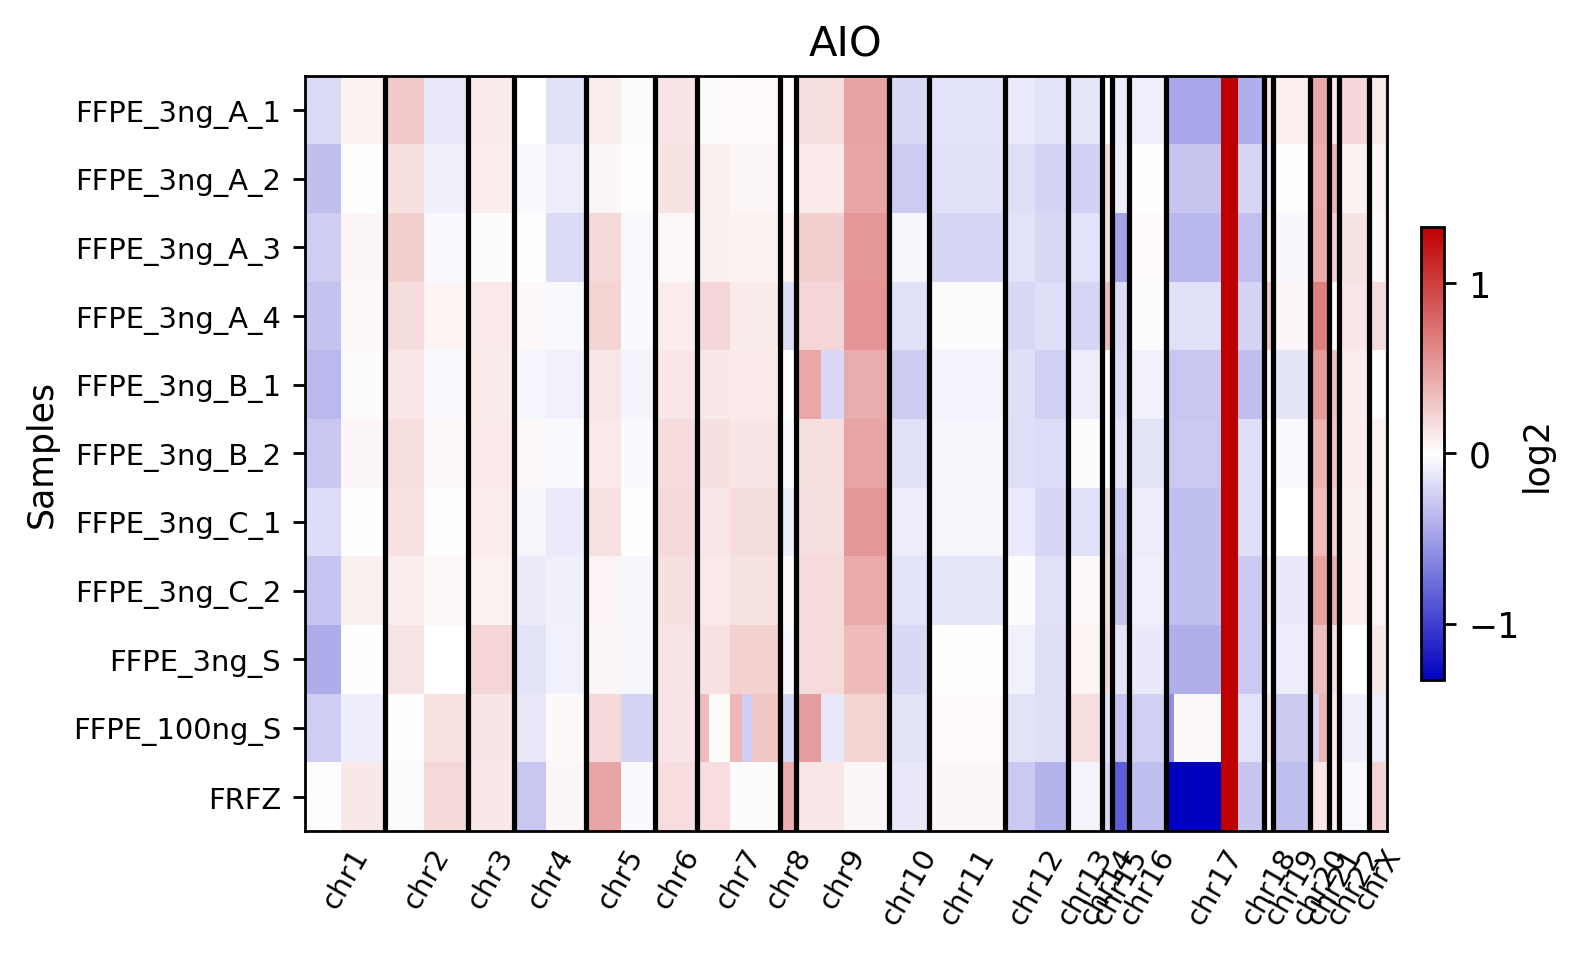

In [4]:
segments = []

for s in sample_names.keys():
    f = '../../data/cna_3_no_umi/{}.cns'.format(s)
    segments.append(cnvlib.read(f,
                            sample_id=sample_names[s]))
ax = cnvlib.do_heatmap(segments,by_bin=True)
ax.set_title("AIO")
plt.rcParams["font.size"] = 9.0
plt.show()

In [5]:
lst_ = []

for f in glob("../../data/cna_3_no_umi/*.cns"):
    path = Path(f)
    cns = pd.read_table(f)
    cns
    cns['sample'] = path.stem.split('.')[0]
    lst_.append(cns)

In [6]:
a = pd.concat(lst_)
df = pd.DataFrame(a.groupby(by=['chromosome','start','end','sample'],as_index=False).mean())

In [7]:
df['segment'] = df['chromosome'] + '_' + df['start'].astype('str') + '_' +  df['end'].astype('str')
df

,chromosome,start,end,sample,log2,depth,probes,weight,segment
0,chr1,10075767,11319542,FRFZ-ready,-0.008340,452.75400,59,2.65010,chr1_10075767_11319542
1,chr1,10075767,11319542,hybr1_S1,-0.190629,9.99391,59,2.65010,chr1_10075767_11319542
2,chr1,10075767,11319542,hybr1_S2,-0.328722,7.39676,59,2.65010,chr1_10075767_11319542
3,chr1,10075767,11319542,hybr1_S4,-0.255507,10.48000,59,2.65010,chr1_10075767_11319542
4,chr1,10075767,11319542,hybr1_S5,-0.305684,8.52205,59,2.65010,chr1_10075767_11319542
5,chr1,10075767,11319542,hybr2_S6,-0.426883,14.03850,59,2.65010,chr1_10075767_11319542
6,chr1,10075767,11319542,hybr3_S7,-0.256059,161.14100,59,2.65010,chr1_10075767_11319542
7,chr1,10075767,11319542,hybr4_S8,-0.363450,15.02950,59,2.65010,chr1_10075767_11319542
8,chr1,10075767,11319542,hybr4_S9,-0.289965,16.86390,59,2.65010,chr1_10075767_11319542
9,chr1,10075767,11319542,hybr5_S10,-0.177212,13.70430,59,2.65010,chr1_10075767_11319542


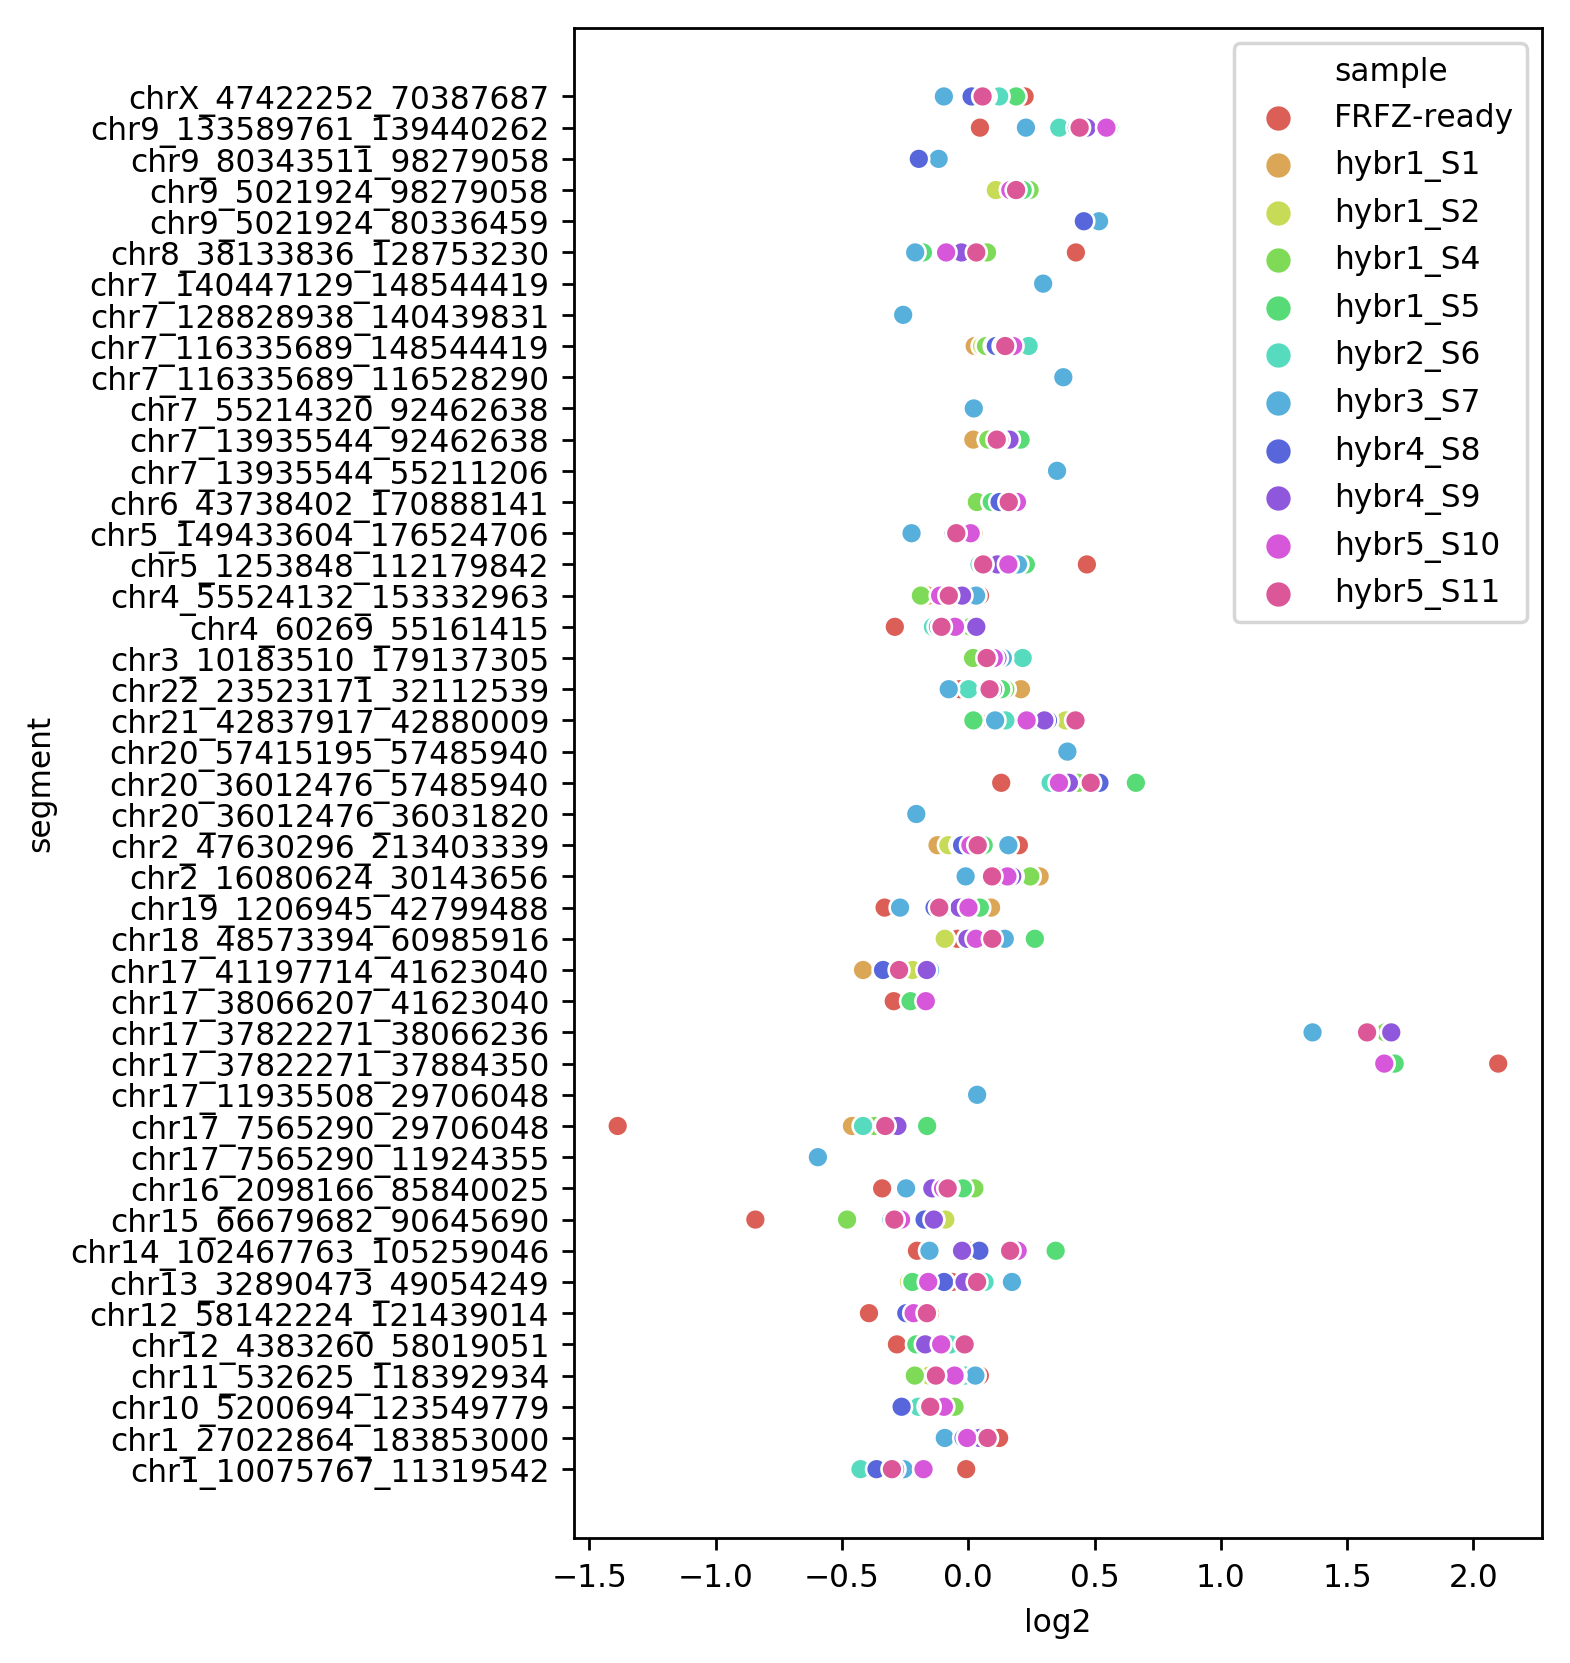

In [8]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(y='segment',
               x='log2',
               data=df,
               hue='sample',
               ax=ax,
               palette='hls')

In [10]:
from pathlib import Path
lst_ = []

for s in sample_names.keys():
    f = '../../data/cna_3_no_umi/{}.cns'.format(s)
    path = Path(f)
    cns = pd.read_table(f)
    cns = cns[['chromosome','start','log2']]
    cns = cns.rename(columns={'log2':sample_names[path.stem]})
    lst_.append(cns)

In [11]:
l = lst_[0]
for k in lst_[1:]:
    l = l.merge(k,on=['chromosome','start'],how='outer')

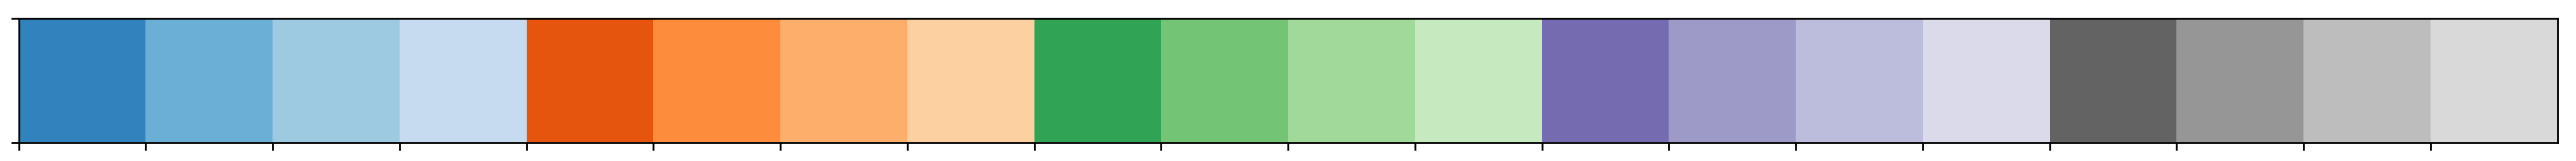

In [12]:
color_scale = sns.color_palette('tab20c').as_hex()
sns.palplot(color_scale)

In [13]:
colors= dict(zip(l.columns[2:-1],color_scale[8:12] + color_scale[:4] +  [color_scale[13]] + [color_scale[4]]))

/Users/DanielaNachmanson/XTHS-analysis/environment/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


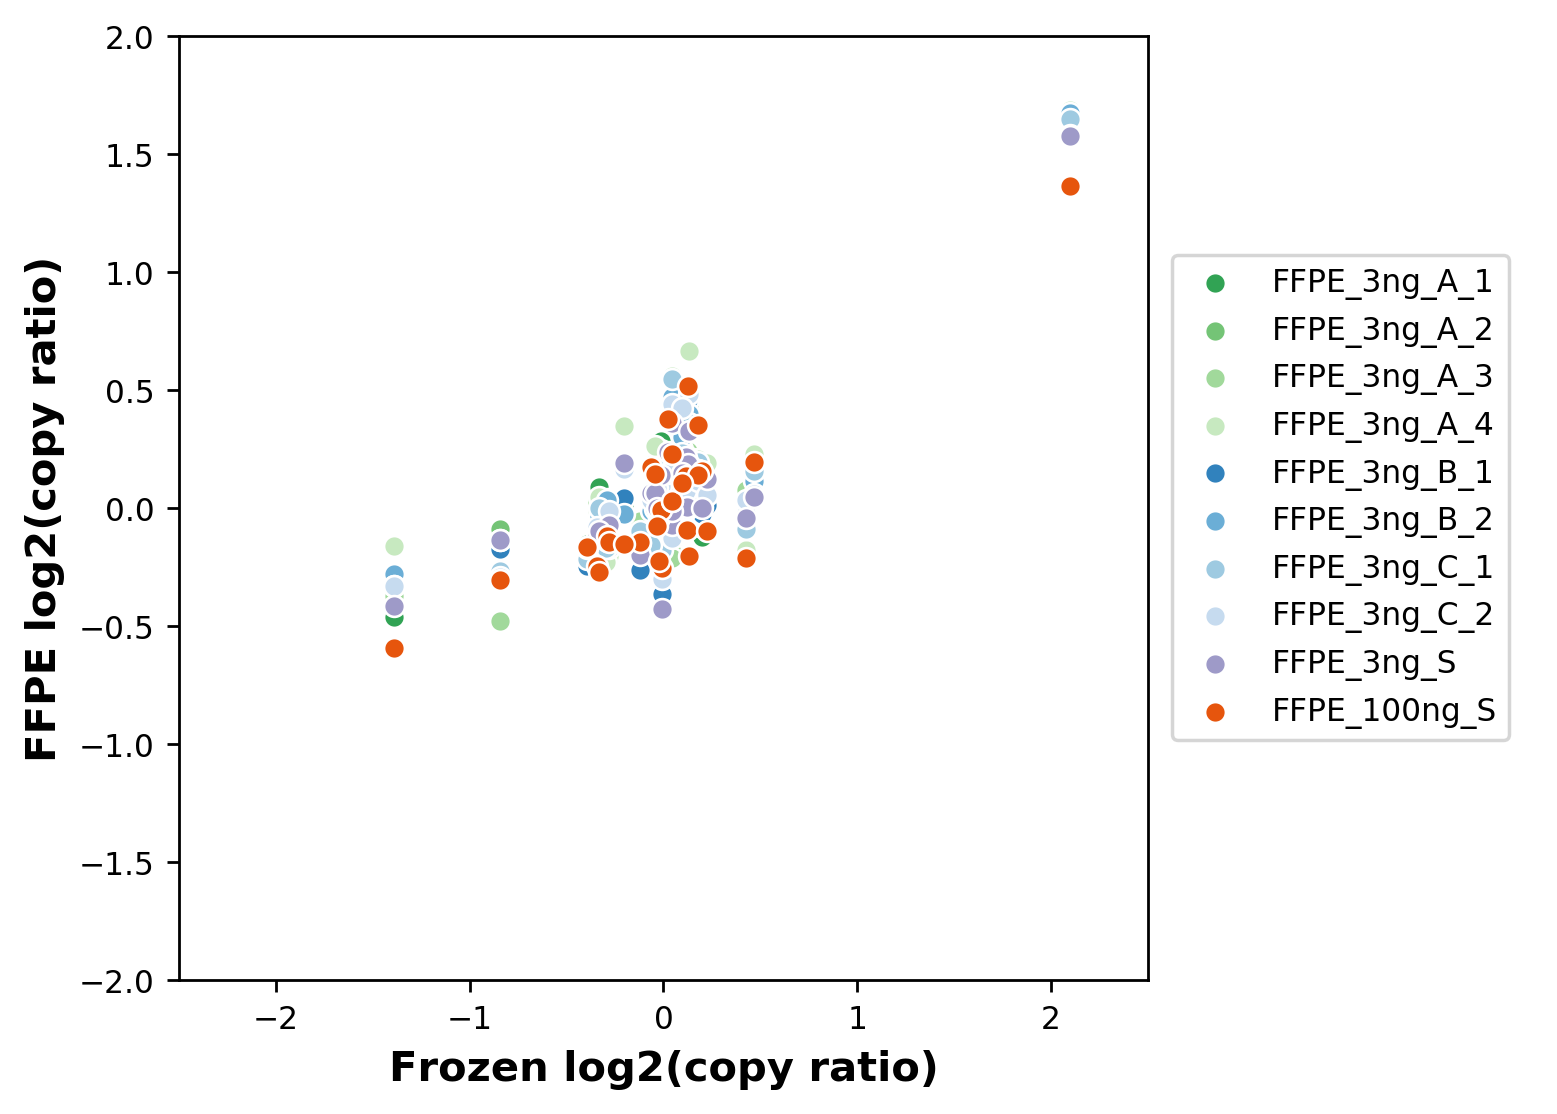

In [18]:
#l = l.fillna(0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

for s in l.columns[2:]:
    if s == 'FRFZ':
        continue
    sns.scatterplot(x=l['FRFZ'],
                    y=l[s],
                    label=s,
                    ax=ax,
                    color=colors[s])
ax.legend().set_visible(False)

ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2,2)
fig.legend(bbox_to_anchor=(1.22, .7), ncol=1)
ax.set_ylabel('FFPE log2(copy ratio)',
             fontsize=12,
             fontweight='bold')
ax.set_xlabel('Frozen log2(copy ratio)',
             fontsize=12,
             fontweight='bold')
fig.show()

In [ ]:
l.dropna()